In [1]:
from diffusers import DiffusionPipeline
import torch

model_id = "/home/siyuan/research/image_to_img_generation/dreambooth/output"
pipe = DiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float16).to("cuda")
prompt = "A human chest x-ray"

/home/siyuan/mambaforge/envs/huggingface/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
image = pipe(prompt, num_inference_steps=50, guidance_scale=7.5).images[0]

100%|██████████| 50/50 [00:05<00:00,  9.15it/s]


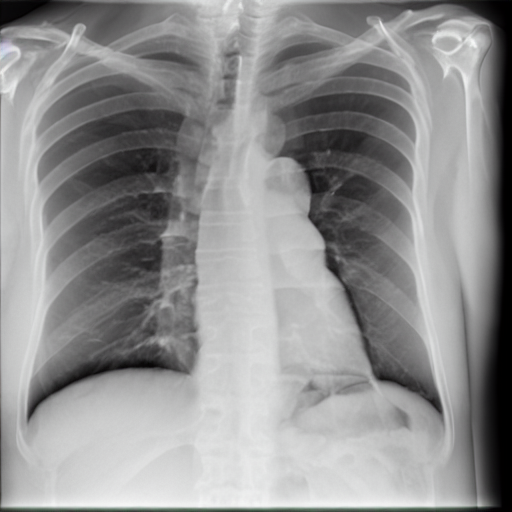

In [3]:
image

Dreambooth with Lora

In [1]:
import torch
from diffusers import StableDiffusionPipeline

model_base = "runwayml/stable-diffusion-v1-5"

pipe = StableDiffusionPipeline.from_pretrained(model_base, torch_dtype=torch.float16)

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.


In [2]:
model_path = '/home/siyuan/research/image_to_img_generation/dreambooth/output_lora'
pipe.unet.load_attn_procs(model_path)
pipe.to("cuda")

image = pipe(
    "A picture of human chest x-ray.",
    num_inference_steps=25,
    guidance_scale=7.5,
    cross_attention_kwargs={"scale": 0.5},
).images[0]

image = pipe("A picture of human chest x-ray.", num_inference_steps=25, guidance_scale=7.5).images[0]

  0%|          | 0/25 [00:00<?, ?it/s]

Potential NSFW content was detected in one or more images. A black image will be returned instead. Try again with a different prompt and/or seed.


  0%|          | 0/25 [00:00<?, ?it/s]

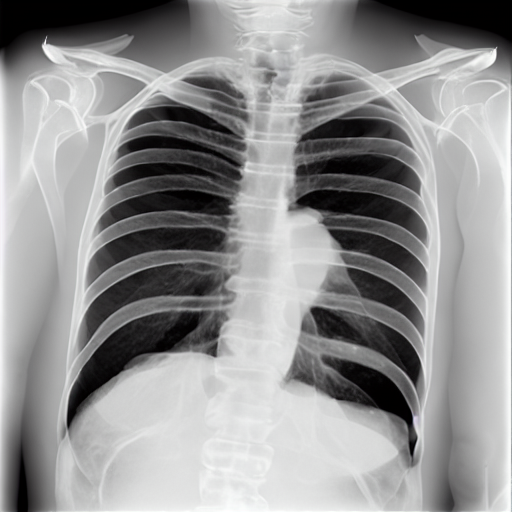

In [3]:
image